# Preprocessing Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
from tqdm import tqdm
import os, cv2

TRAIN_DIR = 'C:/Users/Brendon/URE18/images'
TEST_DIR = 'C:/Users/Brendon/URE18/Test_Images'
TRAIN_LABEL_DIR = 'Data_Entry_2017.csv'
TEST_LABEL_DIR = 'Test_Data.csv'
IMG_SIZE = 256

In [ ]:
# One Hot Encode for Multiple Labels
from sklearn.preprocessing import MultiLabelBinarizer

read_data = pd.read_csv(TRAIN_LABEL_DIR)
split_labels = [items.split('|')[0] for items in read_data.Finding_Labels]
one_hot = MultiLabelBinarizer()
training_labels = one_hot.fit_transform(split_labels)
training_labels = training_labels[:4999]

In [3]:
training_labels.shape

(4999, 33)

In [4]:
def create_batch(directory):
    img_array = []
    for img in tqdm(os.listdir(directory)):
        path = os.path.join(directory, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        img_array.append(img)
    return img_array

In [5]:
training_img = create_batch(TRAIN_DIR)
training_img = np.array(training_img)
training_img = np.expand_dims(training_img, axis = 3)

100%|██████████████████████████████████████| 4999/4999 [05:15<00:00, 15.85it/s]


In [6]:
training_img.shape

(4999, 256, 256, 1)

In [7]:
training_labels.shape

(4999, 33)

# Neural Network

In [8]:
import keras
from keras import models
from keras import layers

Using TensorFlow backend.


In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(33, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                14745664  
__________

In [20]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(training_img, training_labels, epochs = 1, validation_split = 0.1, batch_size = 64)

Train on 4499 samples, validate on 500 samples
Epoch 1/1
4499/4499 [==============================] - ETA: 6:18 - loss: 3.9525 - acc: 0.730 - ETA: 5:28 - loss: 4.1983 - acc: 0.727 - ETA: 5:07 - loss: 4.2522 - acc: 0.727 - ETA: 4:58 - loss: 4.2830 - acc: 0.728 - ETA: 4:49 - loss: 4.3000 - acc: 0.728 - ETA: 4:51 - loss: 4.3214 - acc: 0.727 - ETA: 4:47 - loss: 4.3400 - acc: 0.727 - ETA: 4:45 - loss: 4.3530 - acc: 0.726 - ETA: 4:38 - loss: 4.3674 - acc: 0.726 - ETA: 4:31 - loss: 4.3667 - acc: 0.726 - ETA: 4:27 - loss: 4.3813 - acc: 0.725 - ETA: 4:22 - loss: 4.3713 - acc: 0.726 - ETA: 4:19 - loss: 4.3716 - acc: 0.726 - ETA: 4:13 - loss: 4.3762 - acc: 0.726 - ETA: 4:09 - loss: 4.3696 - acc: 0.727 - ETA: 4:03 - loss: 4.3695 - acc: 0.727 - ETA: 4:00 - loss: 4.3685 - acc: 0.727 - ETA: 3:56 - loss: 4.3697 - acc: 0.727 - ETA: 3:51 - loss: 4.3716 - acc: 0.727 - ETA: 3:48 - loss: 4.3699 - acc: 0.727 - ETA: 3:42 - loss: 4.3748 - acc: 0.727 - ETA: 3:39 - loss: 4.3829 - acc: 0.726 - ETA: 3:35 - loss: 

In [24]:
# Print out Accuracy
print(history.history.keys())
acc

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


[0.7259525796470973]

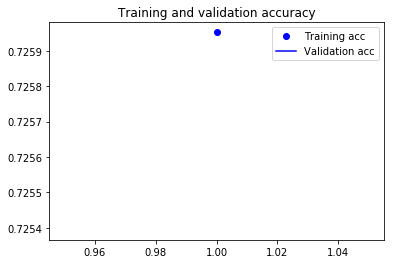

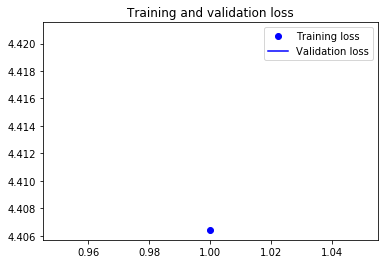

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()